<a href="https://colab.research.google.com/github/MOR1968/Exploratory-Data-Analysis/blob/main/analysexploradonnee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(filepath, header=0)

In [5]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


###  Verification des Types de variable
il est important de comprendre d’abord de quel type de variable il s’agit. Cela nous aidera à trouver la méthode de visualisation la plus appropriée pour cette variable.

In [7]:
# liste les types de variables pour chaque colonne
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [9]:
df['peak-rpm'].dtypes

dtype('float64')

Par exemple nous pouvons calculer la correlation entre les variables de types int64 et float64 en utilisant la methode corr()

In [10]:
# Selectionnons seulement les variables numeriques
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Trouvez la corrélation entre les colonnes suivantes : bore, stroke, compression-ratio et horsepower.

Astuce : si vous souhaitez sélectionner ces colonnes, utilisez la syntaxe suivante :
df[['bore','stroke','compression-ratio','horsepower']]

In [12]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


**bore et stroke** : La corrélation est de -0.055390, ce qui est très proche de 0. Cela indique une très faible corrélation linéaire entre le bore et le stroke.

**bore et compression-ratio** : La corrélation est de 0.001263, également très proche de 0. Cela indique une très faible corrélation linéaire entre le bore et le taux de compression.

**bore et horsepower** : La corrélation est de 0.566936. C'est une corrélation modérée positive. Cela suggère qu'à mesure que le bore augmente, la puissance (horsepower) a tendance à augmenter également.

***stroke et compression-ratio ***: La corrélation est de 0.187923, ce qui est une corrélation faible positive.

**stroke et horsepower** : La corrélation est de 0.098462, ce qui est une corrélation très faible positive.
compression-ratio et horsepower : La corrélation est de -0.214514. C'est une

**corrélation faible négative**. Cela suggère qu'à mesure que le taux de compression augmente, la puissance (horsepower) a tendance à légèrement diminuer.

### Relation linéaire positive

(0.0, 53454.465260676894)

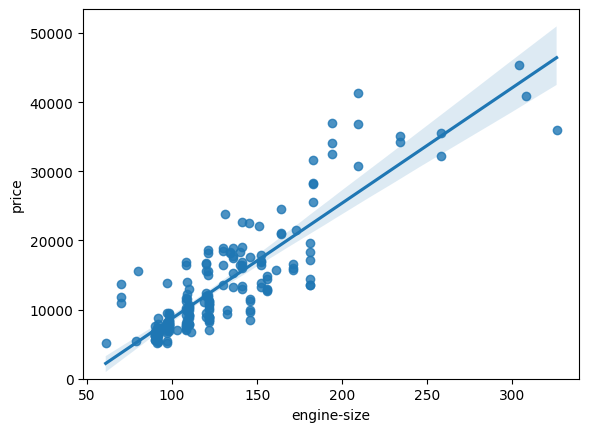

In [13]:
# engine-size comme variable prédictive potentielle du prix
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

Lorsque la taille du moteur augmente, le prix augmente : cela indique une corrélation directe positive entre ces deux variables. La taille du moteur semble être un très bon prédicteur du prix puisque la droite de régression est presque une ligne diagonale parfaite.

Nous pouvons examiner la corrélation entre engine-size et price et constater qu’elle est d’environ 0,87.

In [14]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


La consommation sur autoroute (highway mpg) est une variable prédictive potentielle du prix. Traçons le nuage de points (scatterplot) de highway-mpg et price.

<Axes: xlabel='highway-mpg', ylabel='price'>

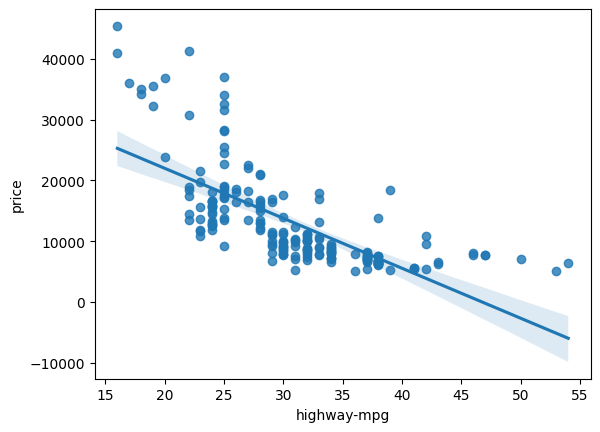

In [15]:
sns.regplot(x="highway-mpg", y="price", data=df)

Lorsque la consommation sur autoroute (highway-mpg) augmente, le prix diminue : cela indique une relation inverse/négative entre ces deux variables. La consommation sur autoroute pourrait potentiellement être un prédicteur du prix.

Nous pouvons examiner la corrélation entre highway-mpg et price et constater qu’elle est d’environ -0,704.

In [16]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


### Relation linéaire faible


Voyons si peak-rpm est une variable prédictive de price.

<Axes: xlabel='peak-rpm', ylabel='price'>

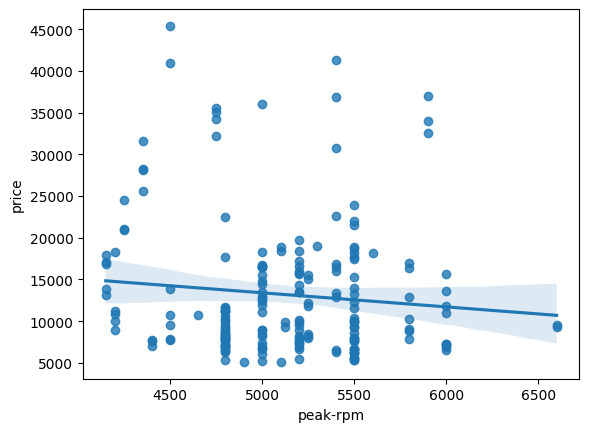

In [17]:
sns.regplot(x="peak-rpm", y="price", data=df)

<Axes: xlabel='peak-rpm', ylabel='price'>

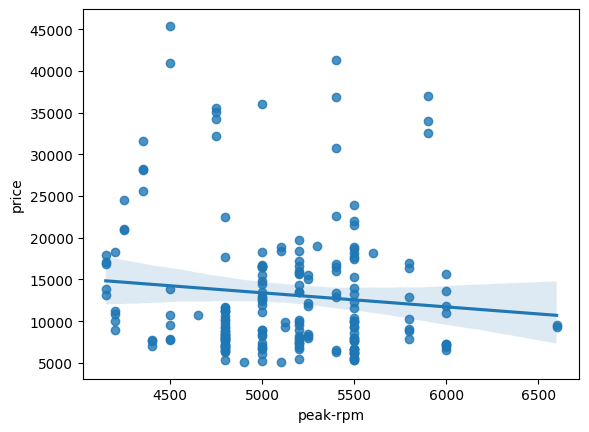

In [18]:
sns.regplot(x="peak-rpm", y="price", data=df)

Peak-rpm ne semble pas du tout être un bon prédicteur du prix, puisque la droite de régression est presque horizontale. De plus, les points de données sont très dispersés et loin de la droite ajustée, montrant beaucoup de variabilité. Par conséquent, ce n’est pas une variable fiable.

Nous pouvons examiner la corrélation entre peak-rpm et price et constater qu’elle est d’environ -0,101616.

In [19]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [20]:
df[['stroke', 'price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


Étant donné les résultats de corrélation entre price et stroke, t’attends-tu à une relation linéaire ?

<Axes: xlabel='stroke', ylabel='price'>

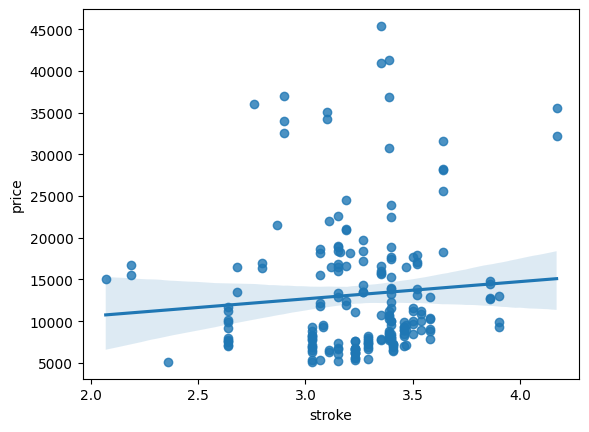

In [21]:
sns.regplot(x="stroke", y="price", data=df)

stroke ne semble pas du tout être un bon prédicteur du prix

**Variables catégorielles**

Ce sont des variables qui décrivent une "caractéristique" d’une unité de données, et qui sont choisies parmi un petit groupe de catégories.

Voyons la relation entre body-style et price.

<Axes: xlabel='body-style', ylabel='price'>

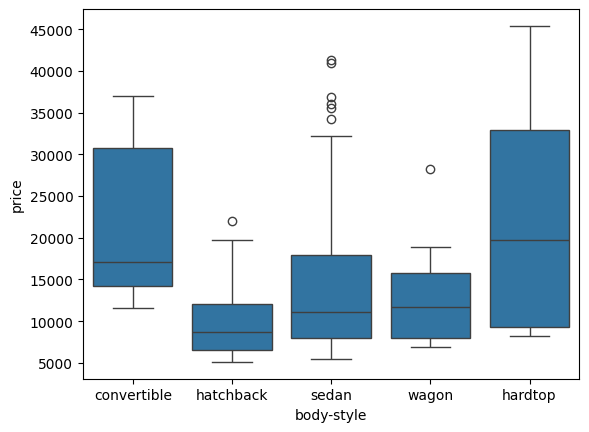

In [22]:
sns.boxplot(x="body-style", y="price", data=df)

Nous voyons que les distributions des prix entre les différentes catégories de body-style se chevauchent beaucoup, donc body-style ne serait pas un bon prédicteur du prix. Voyons maintenant la relation entre engine-location et price :

<Axes: xlabel='engine-location', ylabel='price'>

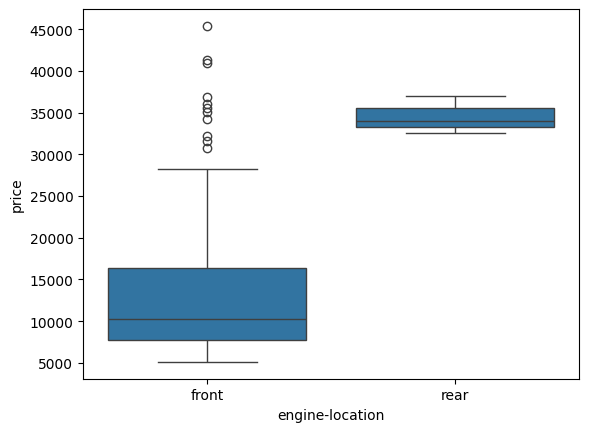

In [23]:
sns.boxplot(x="engine-location", y="price", data=df)

Ici, nous voyons que la distribution des prix entre ces deux catégories de engine-location, front et rear, est suffisamment distincte pour considérer engine-location comme un bon prédicteur potentiel du prix.

Examinons la relation entre drive-wheels et price.

<Axes: xlabel='drive-wheels', ylabel='price'>

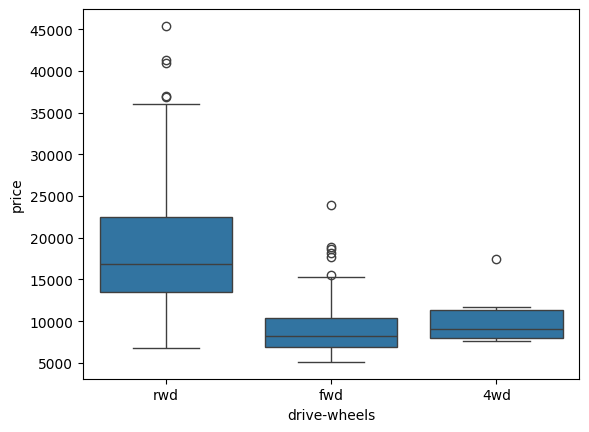

In [24]:
sns.boxplot(x="drive-wheels", y="price", data=df)

Ici, nous voyons que la distribution des prix entre les différentes catégories de drive-wheels est différente. Ainsi, drive-wheels pourrait potentiellement être un prédicteur du prix